# Contraction Descriptors
In this section a short comparison of descriptros will be done. 
... Something on the S Matrix etc and the general Idea.


In [8]:
from os import listdir

import numpy as np
import matplotlib.pyplot as plt

from SCFInitialGuess.utilities.dataset import assemble_batch
from SCFInitialGuess.utilities.constants import number_of_basis_functions as N_BASIS


%matplotlib inline

species = "H"
dim = N_BASIS[species]

def analysis(x, y):
    """This function will analyize the created dataset by printing
    statistical values and plotting.
    """
    
    print(np.var(x, 0))
    print("----------------------------------------")
    print(np.var(y, 0))
    print("----------------------------------------")
    print(np.var(y, 0)/np.var(x, 0))
    
    fig, axes = plt.subplots(dim, dim)
    
    for input_nr in range(dim):
        for output_nr in range(dim):
            axes[input_nr, output_nr].scatter(x[:, input_nr], x[:, output_nr])
    plt.show()

## Weighted sums
The following approaches all work with sums as the inner/outer contractions but vary as to how these vontractions are weighted. The inner sums are normalized w.r.t. the number of summands (= number of basis funcitons)

### No weights (i.e. all weights --> 1)

In [16]:
from SCFInitialGuess.nn.descriptors import WeightedSum as descriptor


x, y = assemble_batch("../dataset", species, descriptor)

[+] 2018-02-24 21:18:37: Assembling batch for: H
[-] 2018-02-24 21:18:37: Fetching data from ../dataset
[ ] 2018-02-24 21:18:37: No atoms of type H found in O
[w] 2018-02-24 21:18:37: There was a problem: [Errno 2] No such file or directory: '../dataset/atoms/H/P.dat'
[ ] 2018-02-24 21:18:37: No atoms of type H found in Br
[ ] 2018-02-24 21:18:37: No atoms of type H found in P
[ ] 2018-02-24 21:18:37: No atoms of type H found in F
[ ] 2018-02-24 21:18:37: No atoms of type H found in Cl
[ ] 2018-02-24 21:18:37: No atoms of type H found in N
[ ] 2018-02-24 21:18:37: No atoms of type H found in C
[ ] 2018-02-24 21:18:37: No atoms of type H found in Si
[ ] 2018-02-24 21:18:37: No atoms of type H found in S
[ ] 2018-02-24 21:18:39: No atoms of type H found in 04_methane-I2_mono2
[ ] 2018-02-24 21:18:39: No atoms of type H found in 17_F3bromomethane-formaldehyde_mono1
[ ] 2018-02-24 21:18:40: No atoms of type H found in 16_F3chloromethane-formaldehyde_mono1
[ ] 2018-02-24 21:18:40: No atoms 

[0.00686147 0.03323334 0.07749726 0.12183873 0.00510802 0.00671004
 0.00547995]
----------------------------------------
[1.28360364e-06 6.06655908e-05 4.73079446e-05 7.83657111e-04
 1.88378119e-07 1.22779462e-07 1.12958568e-07]
----------------------------------------
[1.87074140e-04 1.82544360e-03 6.10446657e-04 6.43192099e-03
 3.68788578e-05 1.82978610e-05 2.06130767e-05]


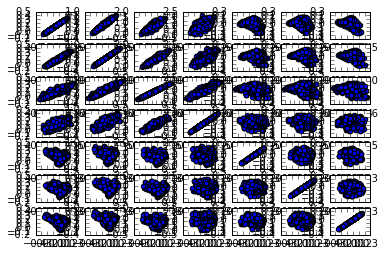

In [17]:
analysis(x, y)

### Weighting with electronegativity

In [10]:
from SCFInitialGuess.nn.descriptors import SumWithElectronegativities as descriptor

x, y = assemble_batch("../dataset", species, descriptor)

[+] 2018-02-24 21:16:38: Assembling batch for: H
[-] 2018-02-24 21:16:38: Fetching data from ../dataset
[ ] 2018-02-24 21:16:38: No atoms of type H found in O
[w] 2018-02-24 21:16:38: There was a problem: [Errno 2] No such file or directory: '../dataset/atoms/H/P.dat'
[ ] 2018-02-24 21:16:38: No atoms of type H found in Br
[ ] 2018-02-24 21:16:38: No atoms of type H found in P
[ ] 2018-02-24 21:16:38: No atoms of type H found in F
[ ] 2018-02-24 21:16:38: No atoms of type H found in Cl
[ ] 2018-02-24 21:16:38: No atoms of type H found in N
[ ] 2018-02-24 21:16:38: No atoms of type H found in C
[ ] 2018-02-24 21:16:38: No atoms of type H found in Si
[ ] 2018-02-24 21:16:38: No atoms of type H found in S
[ ] 2018-02-24 21:16:41: No atoms of type H found in 04_methane-I2_mono2
[ ] 2018-02-24 21:16:41: No atoms of type H found in 17_F3bromomethane-formaldehyde_mono1
[ ] 2018-02-24 21:16:41: No atoms of type H found in 16_F3chloromethane-formaldehyde_mono1
[ ] 2018-02-24 21:16:41: No atoms 

[0.0453026  0.2061035  0.44741137 0.66690142 0.03212204 0.0411357
 0.03349164]
----------------------------------------
[1.28360364e-06 6.06655908e-05 4.73079446e-05 7.83657111e-04
 1.88378119e-07 1.22779462e-07 1.12958568e-07]
----------------------------------------
[2.83339942e-05 2.94345267e-04 1.05737020e-04 1.17507188e-03
 5.86444987e-06 2.98474241e-06 3.37273973e-06]


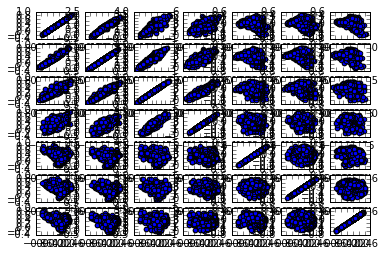

In [11]:
analysis(x, y)

The diagonal elements look relatively fine, but the others show definate bulking behaviour, implying that there is not a unique mapping.

### Weighting with atomic number
The sub contractions (sums) are weight with the atomic number Z.

In [12]:
from SCFInitialGuess.nn.descriptors import SumWithElectronegativities as descriptor


x, y = assemble_batch("../dataset", species, descriptor)

[+] 2018-02-24 21:16:49: Assembling batch for: H
[-] 2018-02-24 21:16:49: Fetching data from ../dataset
[ ] 2018-02-24 21:16:49: No atoms of type H found in O
[w] 2018-02-24 21:16:49: There was a problem: [Errno 2] No such file or directory: '../dataset/atoms/H/P.dat'
[ ] 2018-02-24 21:16:49: No atoms of type H found in Br
[ ] 2018-02-24 21:16:49: No atoms of type H found in P
[ ] 2018-02-24 21:16:49: No atoms of type H found in F
[ ] 2018-02-24 21:16:49: No atoms of type H found in Cl
[ ] 2018-02-24 21:16:49: No atoms of type H found in N
[ ] 2018-02-24 21:16:49: No atoms of type H found in C
[ ] 2018-02-24 21:16:49: No atoms of type H found in Si
[ ] 2018-02-24 21:16:49: No atoms of type H found in S
[ ] 2018-02-24 21:16:51: No atoms of type H found in 04_methane-I2_mono2
[ ] 2018-02-24 21:16:51: No atoms of type H found in 17_F3bromomethane-formaldehyde_mono1
[ ] 2018-02-24 21:16:52: No atoms of type H found in 16_F3chloromethane-formaldehyde_mono1
[ ] 2018-02-24 21:16:52: No atoms 

[0.0453026  0.2061035  0.44741137 0.66690142 0.03212204 0.0411357
 0.03349164]
----------------------------------------
[1.28360364e-06 6.06655908e-05 4.73079446e-05 7.83657111e-04
 1.88378119e-07 1.22779462e-07 1.12958568e-07]
----------------------------------------
[2.83339942e-05 2.94345267e-04 1.05737020e-04 1.17507188e-03
 5.86444987e-06 2.98474241e-06 3.37273973e-06]


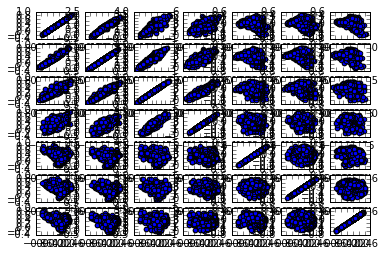

In [13]:
analysis(x, y)

### Number of valence
The number of valence.

In [14]:
from SCFInitialGuess.nn.descriptors import SumWithValenceElectrons as descriptor

x, y = assemble_batch("../dataset", species, descriptor)

[+] 2018-02-24 21:16:59: Assembling batch for: H
[-] 2018-02-24 21:16:59: Fetching data from ../dataset
[ ] 2018-02-24 21:16:59: No atoms of type H found in O
[w] 2018-02-24 21:16:59: There was a problem: [Errno 2] No such file or directory: '../dataset/atoms/H/P.dat'
[ ] 2018-02-24 21:16:59: No atoms of type H found in Br
[ ] 2018-02-24 21:16:59: No atoms of type H found in P
[ ] 2018-02-24 21:16:59: No atoms of type H found in F
[ ] 2018-02-24 21:16:59: No atoms of type H found in Cl
[ ] 2018-02-24 21:16:59: No atoms of type H found in N
[ ] 2018-02-24 21:16:59: No atoms of type H found in C
[ ] 2018-02-24 21:16:59: No atoms of type H found in Si
[ ] 2018-02-24 21:16:59: No atoms of type H found in S
[w] 2018-02-24 21:17:02: There was a problem: 'Br'
[ ] 2018-02-24 21:17:02: No atoms of type H found in 04_methane-I2_mono2
[ ] 2018-02-24 21:17:02: No atoms of type H found in 17_F3bromomethane-formaldehyde_mono1
[w] 2018-02-24 21:17:03: There was a problem: 'Br'
[w] 2018-02-24 21:17:03

[0.10272999 0.39969813 0.723016   0.84591091 0.0580573  0.06647238
 0.05198616]
----------------------------------------
[1.06974276e-06 6.69522628e-05 5.10766423e-05 9.64504930e-04
 2.12909819e-07 1.29980729e-07 1.20224323e-07]
----------------------------------------
[1.04131498e-05 1.67507072e-04 7.06438612e-05 1.14019682e-03
 3.66723594e-06 1.95540947e-06 2.31262163e-06]


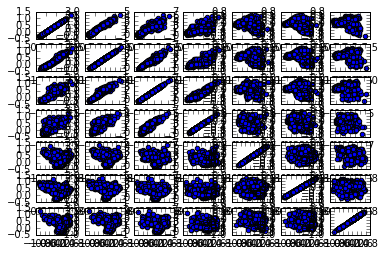

In [15]:
analysis(x, y)